In [4]:
!pip install tensorflow tensorflow-gpu sklearn pandas matplotlib

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [5]:
import pandas as pd
import numpy as np
import tensorflow as tf
import os

In [6]:
df=pd.read_csv('/content/train.csv',error_bad_lines=False,engine="python")

<ipython-input-6-0eeb858aa046>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df=pd.read_csv('/content/train.csv',error_bad_lines=False,engine="python")
Skipping line 31405: unexpected end of data


In [7]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\r\nWhy the edits made under my use...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\r\nMore\r\nI can't make any real suggestions...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [8]:
df.shape

(31403, 8)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31403 entries, 0 to 31402
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             31403 non-null  object
 1   comment_text   31403 non-null  object
 2   toxic          31403 non-null  int64 
 3   severe_toxic   31403 non-null  int64 
 4   obscene        31403 non-null  int64 
 5   threat         31403 non-null  int64 
 6   insult         31403 non-null  int64 
 7   identity_hate  31403 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 1.9+ MB


In [10]:
df.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,31403.000000,31403.000000,31403.000000,31403.000000,31403.000000,31403.000000
mean,0.098143,0.010477,0.052989,0.003248,0.049868,0.008916
std,0.297513,0.101820,0.224014,0.056900,0.217675,0.094006
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.9.3
aiosignal                        1.3.1
alabaster                        0.7.16
albumentations                   1.3.1
altair                           4.2.2
anyio                            3.7.1
appdirs                          1.4.4
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array-record                     0.5.0
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.0
attrs                            23.2.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.14.0
backcall                         0.2.0
beautifulsoup4                   4.12.3
bidict                           0.22.1
b

In [12]:
from tensorflow.keras.layers import TextVectorization

In [13]:
X=df['comment_text']
y=df[df.columns[2:]].values

In [14]:
X

0        Explanation\r\nWhy the edits made under my use...
1        D'aww! He matches this background colour I'm s...
2        Hey man, I'm really not trying to edit war. It...
3        "\r\nMore\r\nI can't make any real suggestions...
4        You, sir, are my hero. Any chance you remember...
                               ...                        
31398    "In a nutshell, if one wants to know if this a...
31399    I totally agree with Local hero . In addition ...
31400    Justin went to med school, you know, so Justin...
31401    "\r\n\r\n Google hits must not be taken as a y...
31402    "\r\n\r\n A kitten for you! \r\n\r\nThank you ...
Name: comment_text, Length: 31403, dtype: object

In [15]:
y

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [16]:
MAX_FEATURES=200000

In [17]:
vectorizer=TextVectorization(max_tokens=MAX_FEATURES, output_sequence_length=1800,output_mode='int')

In [18]:
vectorizer.adapt(X.values)

In [19]:
vectorized_text=vectorizer(X.values)

In [20]:
dataset=tf.data.Dataset.from_tensor_slices((vectorized_text,y))
dataset=dataset.cache()
dataset=dataset.shuffle(160000)
dataset=dataset.batch(16)
dataset=dataset.prefetch(8)

In [21]:
train=dataset.take(int(len(dataset)*.7))
val=dataset.skip(int(len(dataset)*0.7)).take(int(len(dataset)*0.2))
test=dataset.skip(int(len(dataset)*0.9)).take(int(len(dataset)*0.1))

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dropout,Bidirectional,Dense,Embedding

In [23]:
model=Sequential()
model.add(Embedding(MAX_FEATURES+1,32))
model.add(Bidirectional(LSTM(32,activation='tanh')))
model.add(Dense(128,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))

model.add(Dense(6,activation='sigmoid'))

In [24]:
model.compile(loss='BinaryCrossentropy',optimizer='Adam')

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          6400032   
                                                                 
 bidirectional (Bidirection  (None, 64)                16640     
 al)                                                             
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 6)                 774       
                                                        

In [26]:
history=model.fit(train,epochs=1,validation_data=val)

1374/1374 [==============================] - 2153s 2s/step - loss: 0.0912 - val_loss: 0.0572


In [27]:
from matplotlib import pyplot as plt

<Figure size 800x500 with 0 Axes>

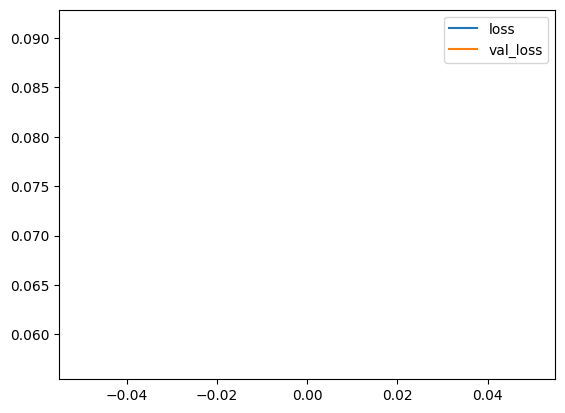

In [28]:
plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

In [32]:
input_text=vectorizer('You freaking suck! I am going to hit you.')

In [38]:
df.columns[2:]

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

In [39]:
batch=test.as_numpy_iterator().next()

In [41]:
batch_X,batch_y=test.as_numpy_iterator().next()

In [34]:
input_text

<tf.Tensor: shape=(1800,), dtype=int64, numpy=array([   7, 6420,  862, ...,    0,    0,    0])>

In [36]:
np.expand_dims(input_text,0)

array([[   7, 6420,  862, ...,    0,    0,    0]])

In [37]:
model.predict(np.expand_dims(input_text,0))

1/1 [==============================] - 0s 118ms/step


array([[0.9705753 , 0.36472458, 0.90477854, 0.06035383, 0.69092995,
        0.11974315]], dtype=float32)

In [43]:
(model.predict(batch_X)>0.5).astype(int)

1/1 [==============================] - 1s 601ms/step


array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [44]:
batch_y

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [48]:
res=model.predict(batch_X)

1/1 [==============================] - 0s 178ms/step


In [52]:
res.flatten().shape

(96,)

In [45]:
from tensorflow.keras.metrics import Precision,Recall,CategoricalAccuracy

In [46]:
pre=Precision()
re=Recall()
acc=CategoricalAccuracy()

In [47]:
for batch in test.as_numpy_iterator():
  X_true,y_true=batch
  yhat=model.predict(X_true)

  y_true=y_true.flatten()
  yhat=yhat.flatten()

  pre.update_state(y_true,yhat)
  re.update_state(y_true,yhat)
  acc.update_state(y_true,yhat)

1/1 [==============================] - 0s 176ms/step


In [53]:
print(f"Precision: {pre.result().numpy()},Recall: {re.result().numpy()}, Accuracy: {acc.result().numpy()}")

Precision: 0.7828842997550964,Recall: 0.6657682061195374, Accuracy: 0.5102040767669678
